In [1]:
import pandas as pd
import nltk
import re

from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

import json
import gzip

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.dumps(eval(l))

f = open("output.strict", 'w')
for l in parse(r"C:\Users\Eswar\Desktop\Hackathon\Music.json.gz"):
    f.write(l + '\n')

import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF(r'C:\Users\Eswar\Desktop\Hackathon\Music.json.gz')

In [3]:
df_use=df[['summary']]

In [4]:
result = [] 
for value in df["overall"]: 
    if value == 1.0: 
        result.append("Negative") 
    elif value==2.0: 
        result.append("Negative") 
    elif value==3.0: 
        result.append("Neutral")
    elif value==4.0: 
        result.append("Positive")
    elif value==5.0: 
        result.append("Positive")
       
df_use["Result"] = result    

C:\Users\Eswar\New folder\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df_use.shape

(10261, 2)

In [6]:
df_use=df_use.loc[df_use['Result']!='Neutral']

In [7]:
df_use.groupby('Result').describe()

summary                   
           count unique    top freq
Result                             
Negative     467    457   Crap    3
Positive    9022   7702  Great   42

In [8]:
df_use.head()

,summary,Result
0,good,Positive
1,Jake,Positive
2,It Does The Job Well,Positive
3,GOOD WINDSCREEN FOR THE MONEY,Positive
4,No more pops when I record my vocals.,Positive


In [9]:
df_use.shape

(9489, 2)

In [10]:
df_use.tail(30)

,summary,Result
10229,Awesome Tone,Positive
10230,D'Addario is the best,Positive
10231,Cadillac of Guitar Strings,Positive
10232,Great for pickin' on the Tele or almost anythi...,Positive
10233,All they claim to be,Positive
10234,Nice strings,Positive
10235,Great strings! They really sing!,Positive
10236,"A little skinny for me, but the quality is und...",Positive
10238,Nice bright sound with easy action,Positive
10239,Stay In Tune Better,Positive


In [11]:
train_df=df_use.iloc[0:-1]

In [12]:
train_df.shape

(9488, 2)

In [13]:
train_df.tail()

,summary,Result
10254,I really like these strings,Positive
10256,Five Stars,Positive
10257,"Long life, and for some players, a good econom...",Positive
10258,Good for coated.,Positive
10259,Taylor Made,Positive


In [14]:
#test_df=df_df.iloc[[-1]]
#test_df.shape

In [15]:
#test_df.head()

In [16]:
data=[['The musical instruments are very good with nice quality','positve']]


In [17]:
test_df=pd.DataFrame(data,columns=['summary','Result'])
test_df.head()

,summary,Result
0,The musical instruments are very good with nic...,positve


In [18]:

number_of_class_labels=len(train_df['Result'].unique())
number_of_class_labels

2

In [19]:

train_df['Result'].unique()

array(['Positive', 'Negative'], dtype=object)

In [20]:
Count_Row=train_df.shape[0] 
Count_Col=train_df.shape[1] 

In [21]:
train_df.shape

(9488, 2)

In [22]:

class_prob_df = pd.DataFrame(columns=['Result', 'probability'], index=range(number_of_class_labels))
class_prob_df

,Result,probability
0,NaN,NaN
1,NaN,NaN


In [23]:
train_df['Result'].value_counts()
    

Positive    9021
Negative     467
Name: Result, dtype: int64

In [24]:
i=0
for val, cnt in train_df['Result'].value_counts().iteritems():
    print ('value', val, 'was found', cnt, 'times')
    class_prob_df.loc[i].Result = val
    class_prob_df.loc[i].probability = cnt/Count_Row
    i = i +1
    
class_prob_df

value Positive was found 9021 times
value Negative was found 467 times


,Result,probability
0,Positive,0.95078
1,Negative,0.0492201


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
row.summary

'The musical instruments are very good with nice quality'

In [45]:
train_df['summary'].dtype

dtype('O')

In [26]:

import re
#nltk.download('punkt')
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

all_tokens = []

for idx, row in train_df.iterrows():
    for word in word_tokenize(row.summary):
        all_tokens.append(word)
    
print(len(all_tokens), all_tokens)


47088 ['good', 'Jake', 'It', 'Does', 'The', 'Job', 'Well', 'GOOD', 'WINDSCREEN', 'FOR', 'THE', 'MONEY', 'No', 'more', 'pops', 'when', 'I', 'record', 'my', 'vocals', '.', 'The', 'Best', 'Cable', 'Monster', 'Standard', '100', '-', '21', "'", 'Instrument', 'Cable', 'Great', 'cable', 'Best', 'Instrument', 'Cables', 'On', 'The', 'Market', 'One', 'of', 'the', 'best', 'instrument', 'cables', 'within', 'the', 'brand', 'It', 'works', 'great', 'but', 'I', 'hardly', 'use', 'it', '.', 'awesome', 'It', 'works', '!', 'Definitely', 'Not', 'For', 'The', 'Seasoned', 'Piano', 'Player', 'Durable', 'Instrument', 'Cable', 'fender', '18', 'ft.', 'Cali', 'clear', '...', 'So', 'far', 'so', 'good', '.', 'Will', 'revisit', 'at', 'the', '6', 'month', 'mark', ';', ')', 'Add', 'California', 'to', 'the', 'name', 'and', 'I', 'jump', '!', 'Cheap', 'and', 'cool', 'looking', ',', 'good', 'length', 'Fender', '18', 'Feet', 'California', 'Clear', 'Instrument', 'Cable', '-', 'Lake', 'Placid', 'Blue', 'Guitar', 'Cable', 'Qu

In [27]:
# get only unique tokens
all_tokens_unique = set(all_tokens)
print(len(all_tokens_unique), all_tokens_unique)

5907 {'prro', 'waves', 'Tablet', 'Micro-Fiber', 'six', 'INSTEAD', 'probably', 'micing', 'Child-resistant', 'reverb', 'told', 'Ergo', 'SN-5', 'Strap', 'beginner', 'Wang', 'DISTORTION', 'Fresh', 'Website', 'Zep', 'flute', 'Taking', '90', 'decoration', 'everywhere', 'batch', 'figured', 'Rotomatics', 'fluctuate', 'Sweeeet', 'polishing', 'alittle', 'used-', 'Well', 'minute', 'Lifetime', 'Competes', 'bonus', 'usually', 'however', 'molly', 'small', 'Tip', 'Everybody', 'shoulder', 'fly', 'Raising', '1/4', 'doctor', 'lil', 'backer', 'Ordered', 'IPhone', 'Mark', 'sweeter', 'Inclusive', 'Band', 'baby', 'grip', 'shopping', 'Kind', 'recording', "'more", 'STRUMMING', 'good-sounding', '1.38mm', 'Grand', 'reasonably', 'Samick', 'Coated', 'wonderful', 'Durability', 'MAD', 'Fully', 'died', 'nanoweb', '5-Watt', 'Incredibly', 'ingenius', '7', 'Could', 'fault', 'fibers', 'promised', 'convenient', 'realize', 'THE', 'Finger-Picking', 'lt', 'source', 'broken', 'Basic', 'their', 'Input', 'Velcro', 'Squier', 'w

In [28]:

stop_words = set(stopwords.words('english'))

tokens = [w for w in all_tokens_unique if not w in stop_words]
print(len(tokens), tokens)

tokens1=[]
tokens = [word for word in tokens if word.isalpha()]
print(len(tokens), tokens)

5794 ['prro', 'waves', 'Tablet', 'Micro-Fiber', 'six', 'INSTEAD', 'probably', 'micing', 'Child-resistant', 'reverb', 'told', 'Ergo', 'SN-5', 'Strap', 'beginner', 'Wang', 'DISTORTION', 'Fresh', 'Website', 'Zep', 'flute', 'Taking', '90', 'decoration', 'everywhere', 'batch', 'figured', 'Rotomatics', 'fluctuate', 'Sweeeet', 'polishing', 'alittle', 'used-', 'Well', 'minute', 'Lifetime', 'Competes', 'bonus', 'usually', 'however', 'molly', 'small', 'Tip', 'Everybody', 'shoulder', 'fly', 'Raising', '1/4', 'doctor', 'lil', 'backer', 'Ordered', 'IPhone', 'Mark', 'sweeter', 'Inclusive', 'Band', 'baby', 'grip', 'shopping', 'Kind', 'recording', "'more", 'STRUMMING', 'good-sounding', '1.38mm', 'Grand', 'reasonably', 'Samick', 'Coated', 'wonderful', 'Durability', 'MAD', 'Fully', 'died', 'nanoweb', '5-Watt', 'Incredibly', 'ingenius', '7', 'Could', 'fault', 'fibers', 'promised', 'convenient', 'realize', 'THE', 'Finger-Picking', 'lt', 'source', 'broken', 'Basic', 'Input', 'Velcro', 'Squier', 'wire', 'Je

In [29]:
word = ['@', 'rr', '!', '$', '@', 'jfjf', '&','(', ')', ',']
for word in word:
    if word.isalpha():
        print("yes it is alpha: ", word)

yes it is alpha:  rr
yes it is alpha:  jfjf


In [30]:
train_df.values

array([['good', 'Positive'],
       ['Jake', 'Positive'],
       ['It Does The Job Well', 'Positive'],
       ...,
       ['Long life, and for some players, a good economic choice, too',
        'Positive'],
       ['Good for coated.', 'Positive'],
       ['Taylor Made', 'Positive']], dtype=object)

In [31]:
# merge documents for each category
merged_train_df = train_df.groupby('Result')['summary'].apply(' '.join).reset_index()

merged_train_df

,Result,summary
0,Negative,Definitely Not For The Seasoned Piano Player C...
1,Positive,good Jake It Does The Job Well GOOD WINDSCREEN...


In [32]:
for idx, row in merged_train_df.iterrows():
    
    temp1_tokens = []
    for word in word_tokenize(row.summary):
        temp1_tokens.append(word)
    
    temp1_tokens = set(temp1_tokens)
         
    temp2_tokens = []
    for word in temp1_tokens:
        if not word in stop_words:
            temp2_tokens.append(word)           
    
    temp3_tokens = []
    for word in temp2_tokens:
        if word.isalpha():
            temp3_tokens.append(word)
            
    print(temp3_tokens)
    temp4_tokens = " ".join(temp3_tokens)
    print(temp4_tokens)
    
    merged_train_df.at[idx, 'summary'] = temp4_tokens
    merged_train_df.at[idx, 'no_of_words_in_category'] = len(temp3_tokens)

['Bare', 'finger', 'gona', 'Tablet', 'Comfort', 'static', 'DR', 'Its', 'Continues', 'good', 'probably', 'Might', 'unnecessary', 'semi', 'ok', 'British', 'purpose', 'Really', 'favorite', 'well', 'many', 'doubt', 'Clip', 'working', 'cheaper', 'Capo', 'Strap', 'Cradle', 'fix', 'nylon', 'GARBAGE', 'reviewers', 'Pitch', 'would', 'yet', 'Me', 'choices', 'Volume', 'DISTORTION', 'destroyed', 'MIDI', 'knowledge', 'amp', 'Yak', 'Tuner', 'unreliable', 'Terrible', 'colors', 'Taking', 'snapped', 'strap', 'really', 'everywhere', 'connection', 'perhaps', 'flawed', 'Beware', 'degrees', 'boom', 'playing', 'last', 'It', 'tune', 'ever', 'Should', 'even', 'Adds', 'Dangerous', 'model', 'CHINA', 'WHAT', 'Poor', 'packing', 'Pretty', 'hard', 'wrong', 'terrible', 'slotted', 'Sounds', 'trying', 'Junky', 'Something', 'Dead', 'Other', 'These', 'cool', 'Small', 'cables', 'small', 'immediately', 'opinion', 'A', 'major', 'UNWANTED', 'year', 'Snark', 'universal', 'Total', 'E', 'Seller', 'bust', 'dual', 'THIS', 'chrom

['prro', 'waves', 'Tablet', 'six', 'INSTEAD', 'probably', 'micing', 'reverb', 'told', 'Ergo', 'Strap', 'beginner', 'Wang', 'Fresh', 'Website', 'Zep', 'flute', 'decoration', 'batch', 'figured', 'Rotomatics', 'fluctuate', 'Sweeeet', 'polishing', 'alittle', 'Well', 'minute', 'Lifetime', 'Competes', 'bonus', 'usually', 'however', 'molly', 'small', 'Tip', 'Everybody', 'shoulder', 'fly', 'Raising', 'doctor', 'lil', 'backer', 'Ordered', 'IPhone', 'Mark', 'sweeter', 'Inclusive', 'Band', 'baby', 'grip', 'shopping', 'Kind', 'recording', 'STRUMMING', 'Grand', 'reasonably', 'Samick', 'Coated', 'wonderful', 'Durability', 'MAD', 'Fully', 'nanoweb', 'Incredibly', 'ingenius', 'Could', 'fault', 'promised', 'convenient', 'realize', 'THE', 'lt', 'source', 'broken', 'Basic', 'Input', 'Velcro', 'Squier', 'wire', 'Jewlery', 'Longest', 'bow', 'Connect', 'As', 'Stings', 'GIBSON', 'Bypass', 'Controller', 'install', 'issue', 'constructed', 'Half', 'With', 'SHURE', 'Component', 'wan', 'heavy', 'Last', 'Mic', 'po

In [33]:
merged_train_df

,Result,summary,no_of_words_in_category
0,Negative,Bare finger gona Tablet Comfort static DR Its ...,933.0
1,Positive,prro waves Tablet six INSTEAD probably micing ...,4784.0


In [34]:
# merge to get catgory probability
# merged_train_df
# class_prob_df
merged_train_df = pd.merge(merged_train_df, class_prob_df[['Result', 'probability']], on='Result')

In [35]:
merged_train_df

,Result,summary,no_of_words_in_category,probability
0,Negative,Bare finger gona Tablet Comfort static DR Its ...,933.0,0.0492201
1,Positive,prro waves Tablet six INSTEAD probably micing ...,4784.0,0.95078


In [36]:
final_df = pd.DataFrame()

row_counter = 0

for idx, row in merged_train_df.iterrows():
    for token in tokens:
        # find the number of occurances of the token in the current category of documents
        no_of_occurances = row.summary.count(token)
        no_of_words_in_category = row.no_of_words_in_category
        no_unique_words_all = len(tokens)
        
        prob_of_token = (no_of_occurances+ 1)/ (no_of_words_in_category+ no_unique_words_all)
        #print(row.class_label, token, no_of_occurances, prob_of_token)
        final_df.at[row_counter, 'Result'] = row.Result
        final_df.at[row_counter, 'token'] = token
        final_df.at[row_counter, 'no_of_occurances'] = no_of_occurances
        final_df.at[row_counter, 'no_of_words_in_category'] = no_of_words_in_category
        final_df.at[row_counter, 'no_unique_words_all'] = no_unique_words_all
        final_df.at[row_counter, 'prob_of_token_category'] = prob_of_token
        
        row_counter = row_counter + 1

In [37]:
final_df

,Result,token,no_of_occurances,no_of_words_in_category,no_unique_words_all,prob_of_token_category
0,Negative,prro,0.0,933.0,5114.0,0.000165
1,Negative,waves,0.0,933.0,5114.0,0.000165
2,Negative,Tablet,1.0,933.0,5114.0,0.000331
3,Negative,six,0.0,933.0,5114.0,0.000165
4,Negative,INSTEAD,0.0,933.0,5114.0,0.000165
...,...,...,...,...,...,...
10223,Positive,Doea,1.0,4784.0,5114.0,0.000202
10224,Positive,son,21.0,4784.0,5114.0,0.002223
10225,Positive,multiple,2.0,4784.0,5114.0,0.000303
10226,Positive,beginers,1.0,4784.0,5114.0,0.000202


In [38]:
# Calculate P(Category/Document) 
#      = P(Category) * P(Word1/Category) * P(Word2/Category) * P(Word3/Category)

# P(Auto/D6) = P(Auto) * P(Engine/Auto) * P(Noises/Auto) * P(Car/Auto)
for idx, row in test_df.iterrows():
    
    # tokenize & unique words
    temp1_tokens = []
    for word in word_tokenize(row.summary):
        temp1_tokens.append(word)
        #temp1_tokens = set(temp1_tokens)
        
    # remove stop words
    temp2_tokens = []
    for word in temp1_tokens:
        if not word in stop_words:
            temp2_tokens.append(word)
          
    # remove punctuations
    temp3_tokens = []
    for word in temp2_tokens:
        if word.isalpha():
            temp3_tokens.append(word)
            
    #temp4_tokens = " ".join(temp3_tokens)
    #print(temp4_tokens)
    
    prob = 1 
    
    # process for each class_label
    for idx1, row1 in merged_train_df.iterrows():
        print("class: "+ row1.Result)
        for token in temp3_tokens:
            # find the token in final_df for the given category, get the probability
            # row1.class_label & token
        
            print("      : "+ token)  
        
            temp_df = final_df[(final_df['Result'] == row1.Result) & (final_df['token'] == token)]

            # process for exception
            if (temp_df.shape[0] == 0):
                token_prob = 1/(row1.no_of_words_in_category+ no_unique_words_all)
                print("       no token found prob :", token_prob)
                prob = prob * token_prob
            else:
                token_prob = temp_df.get_value(temp_df.index[0],'prob_of_token_category')
                print("       token prob          :", token_prob)
                prob = prob * token_prob

            prob = prob * row1.probability

        col_at = 'prob_'+row1.Result

        test_df.at[idx, col_at] = prob


test_df

class: Negative
      : The
       token prob          : 0.000992227550851662
      : musical
       token prob          : 0.000165371258475277
      : instruments
       token prob          : 0.000165371258475277
      : good
       token prob          : 0.000330742516950554
      : nice
       token prob          : 0.000330742516950554
      : quality
       token prob          : 0.000330742516950554
class: Positive
      : The
       token prob          : 0.0007072135785007072
      : musical
       token prob          : 0.00020206102242877348
      : instruments
       token prob          : 0.00020206102242877348
      : good
       token prob          : 0.0003030915336431602
      : nice
       token prob          : 0.0006061830672863204
      : quality
       token prob          : 0.00020206102242877348


C:\Users\Eswar\New folder\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,summary,Result,prob_Negative,prob_Positive
0,The musical instruments are very good with nic...,positve,1.395901e-29,1.105377e-50


In [39]:
Negative_Prob=test_df['prob_Negative']
Positive_Prob=test_df['prob_Positive']

In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline

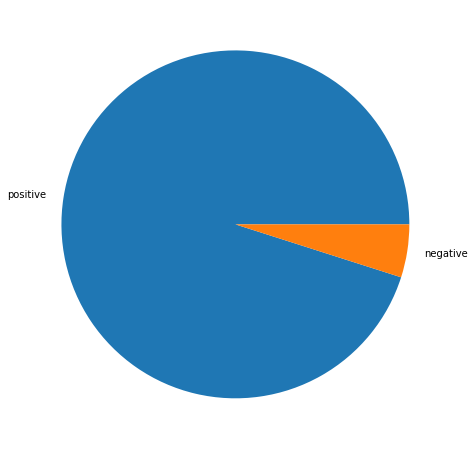

In [41]:
plt.figure(figsize= (8,8))
plt.pie(train_df['Result'].value_counts(),labels=['positive','negative'])
plt.show()

C:\Users\Eswar\New folder\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


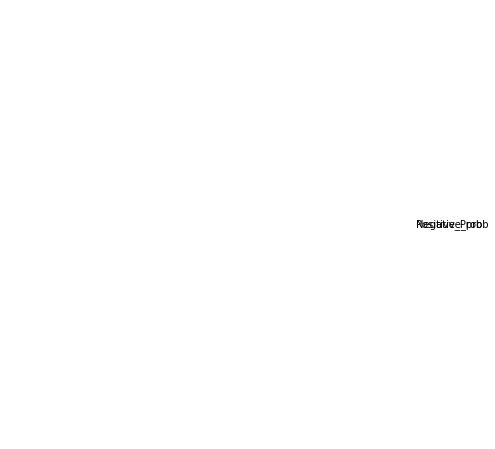

In [42]:
plt.figure(figsize=(8,8))
counts=[Positive_Prob,Negative_Prob]
plt.pie(counts,labels=['Positive_Prob','Negative_prob'])
plt.show()